In [ ]:
from google.colab import files

# Paso 1: Subir los archivos desde la computadora
uploaded = files.upload()

Saving iris.data to iris.data
Saving iris.names to iris.names


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Paso 1: Leer el contenido de iris.names para entender el dataset
names_file_path = 'iris.names'
with open(names_file_path, 'r') as file:
    names_content = file.read()
    print("Contenido de iris.names:\n")
    print(names_content)

# Paso 2: Cargar el Dataset iris.data
data_file_path = 'iris.data'
column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
iris_df = pd.read_csv(data_file_path, header=None, names=column_names)

# Mostrar las primeras filas del dataset para verificar la carga
print("\nPrimeras filas del dataset:\n")
print(iris_df.head())

# Paso 3: Seleccionar las características Petal Length y Petal Width
X = iris_df[['petal_length', 'petal_width']]
y = iris_df['class']

# Paso 4: Dividir el Dataset en Entrenamiento y Prueba
# 80% de los datos para entrenamiento y 20% para test
datos_train = X.sample(frac=0.8, random_state=42)
datos_test = X.drop(datos_train.index)
y_train = y.loc[datos_train.index]
y_test = y.loc[datos_test.index]

# Paso 5: Entrenar el Modelo de Regresión Logística usando Petal Length y Petal Width
logreg = LogisticRegression(max_iter=200)
logreg.fit(datos_train, y_train)

# Predecir las clases en el conjunto de prueba y entrenamiento
datos_train['predicted_class'] = logreg.predict(datos_train)
datos_test['predicted_class'] = logreg.predict(datos_test)

# Paso 6: Evaluar el Rendimiento del Modelo de testeo
# Matriz de Confusión
matriz_confusion = pd.crosstab(y_test, datos_test['predicted_class'], rownames=['Actual'], colnames=['Predicted'])

# Reporte de Clasificación
class_report = classification_report(y_test, datos_test['predicted_class'])

# Interpretar los Resultados
print("\nMatriz de Confusión:\n", matriz_confusion)
print("\nReporte de Clasificación:\n", class_report)

# Calcular la Precisión
precision = np.mean(y_test == datos_test['predicted_class'])
print("Precisión del modelo: ", precision)

# Paso 7: Convertir las labels de clase como números para calcular MSE
label_convert = LabelEncoder()
y_train_convertida = label_convert.fit_transform(y_train)
y_test_convertida = label_convert.transform(y_test)
train_pred_convertida = label_convert.transform(datos_train['predicted_class'])
test_pred_convertida = label_convert.transform(datos_test['predicted_class'])

# Calcular el Error Cuadrático Medio (MSE) para los conjuntos de entrenamiento y prueba
train_mse = mean_squared_error(y_train_convertida, train_pred_convertida)
test_mse = mean_squared_error(y_test_convertida, test_pred_convertida)

print("\nError Cuadrático Medio (MSE) en el conjunto de entrenamiento: ", train_mse)
print("Error Cuadrático Medio (MSE) en el conjunto de prueba: ", test_mse)


FileNotFoundError: [Errno 2] No such file or directory: 'iris.names'

# **Iris model sin Capas Ocultas - Redes Neuronales**

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2980 - loss: 1.4028  
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2980 - loss: 1.3707 
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2980 - loss: 1.3420 
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2980 - loss: 1.3163 
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2980 - loss: 1.2933 
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2980 - loss: 1.2727 
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2980 - loss: 1.2538 
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2948 - loss: 1.2363 
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3002 - loss: 1.2199 
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3300 - loss: 1.2043 
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3300 - loss: 1.1893 
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

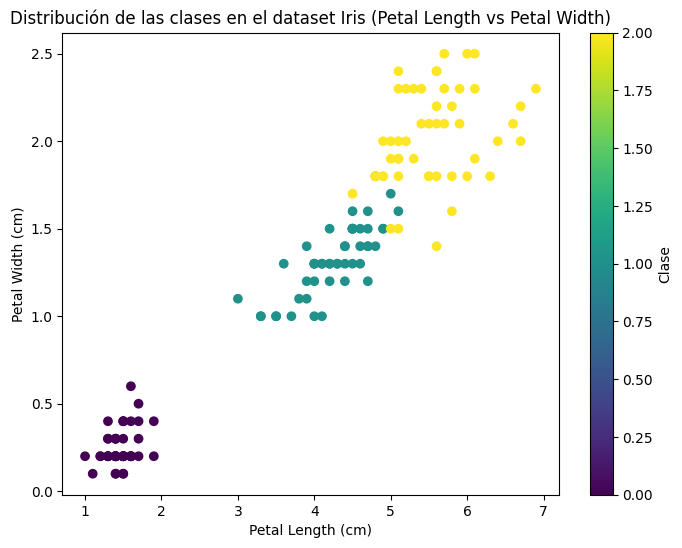

10863/10863 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step


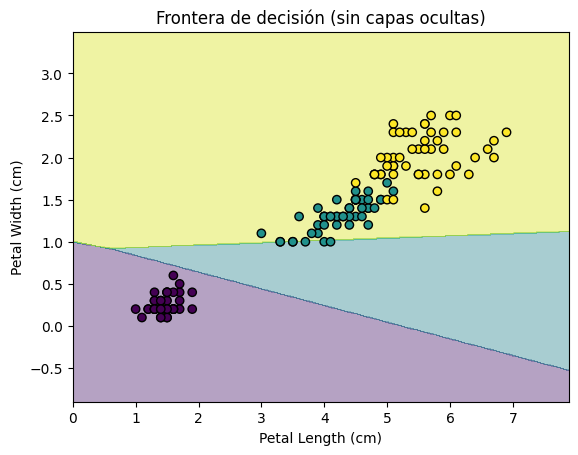

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 285ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Mean Squared Error (MSE) difference: 0.0045
Mean Squared Error (MSE) on training data: 0.1427
Mean Squared Error (MSE) on test data: 0.1382


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import tensorflow as tf
import random

# Fijar la semilla para reproducibilidad
seed_value = 30
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)

# Cargar el dataset Iris
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, 2:]  # Usamos solo Petal Length y Petal Width
y = iris.target  # Clases

# Convertir las clases a formato categórico (one-hot encoding)
encoder = LabelEncoder()
y_encoded = to_categorical(encoder.fit_transform(y))

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=seed_value)

# Crear el modelo de red neuronal sin capas ocultas
model = Sequential()
model.add(Dense(units=3, input_shape=(X_train.shape[1],), activation='softmax'))  # 3 clases de salida

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba: {accuracy * 100:.2f}%')

# Visualización de la distribución de los puntos
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Distribución de las clases en el dataset Iris (Petal Length vs Petal Width)')
plt.colorbar(scatter, label='Clase')
plt.show()

# Visualización de las fronteras de decisión
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Concatenar los valores de la cuadrícula
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Predecir con el modelo de red neuronal sin capas ocultas
Z = model.predict(grid_points)
Z = np.argmax(Z, axis=1).reshape(xx.shape)

# Graficar las fronteras de decisión
plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o', cmap='viridis')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Frontera de decisión (sin capas ocultas)')
plt.show()


# Mean Squared Error (MSE) Calculation for both Train and Test Data
y_train_pred_probs = model.predict(X_train)
y_test_pred_probs = model.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred_probs)
mse_test = mean_squared_error(y_test, y_test_pred_probs)
mse_diff = mse_train - mse_test

# Print MSE results
print(f'Mean Squared Error (MSE) difference: {mse_diff:.4f}')
print(f'Mean Squared Error (MSE) on training data: {mse_train:.4f}')
print(f'Mean Squared Error (MSE) on test data: {mse_test:.4f}')




---



# **Iris model con Capas Ocultas - Redes Neuronales**

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.2479 - loss: 1.4634 - val_accuracy: 0.4167 - val_loss: 1.2243
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2479 - loss: 1.3269 - val_accuracy: 0.4167 - val_loss: 1.1384
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2627 - loss: 1.2216 - val_accuracy: 0.5417 - val_loss: 1.0773
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4763 - loss: 1.1442 - val_accuracy: 0.6667 - val_loss: 1.0363
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4522 - loss: 1.0894 - val_accuracy: 0.6250 - val_loss: 1.0097
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.3949 - loss: 1.0511 - val_accuracy: 0.4167 - val_loss: 0.9921
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.3949 - loss: 1.0236 - val_accuracy: 0.4167 - val_loss: 0.9798
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3949 - loss: 1.0031 - val_accuracy: 0.3750 - val_loss:

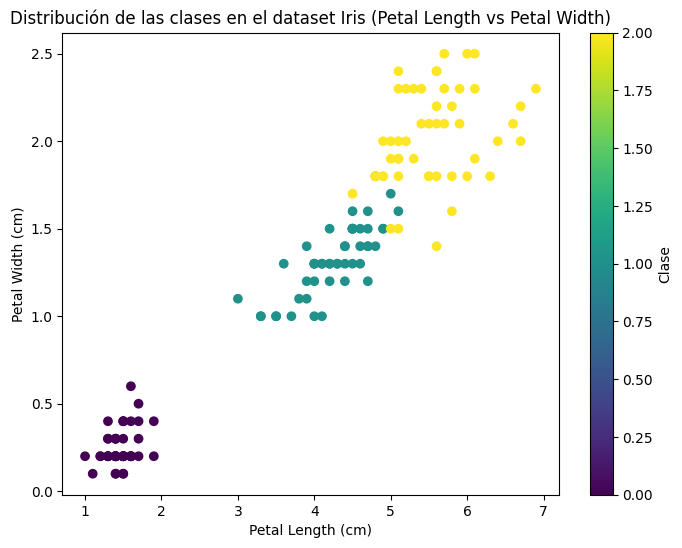

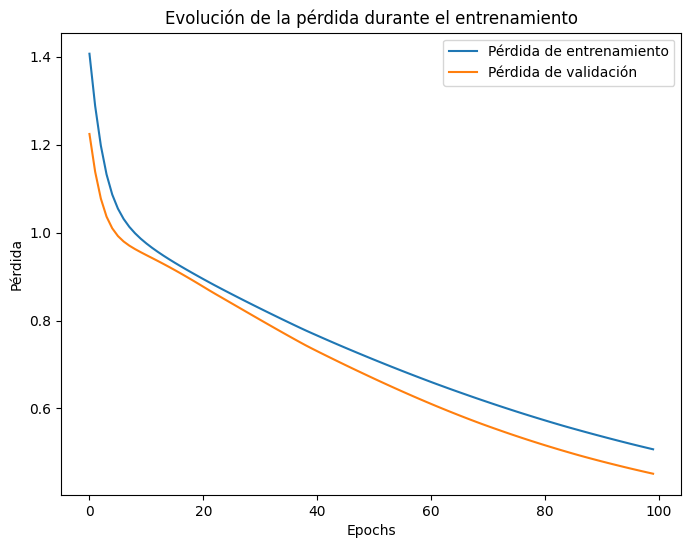

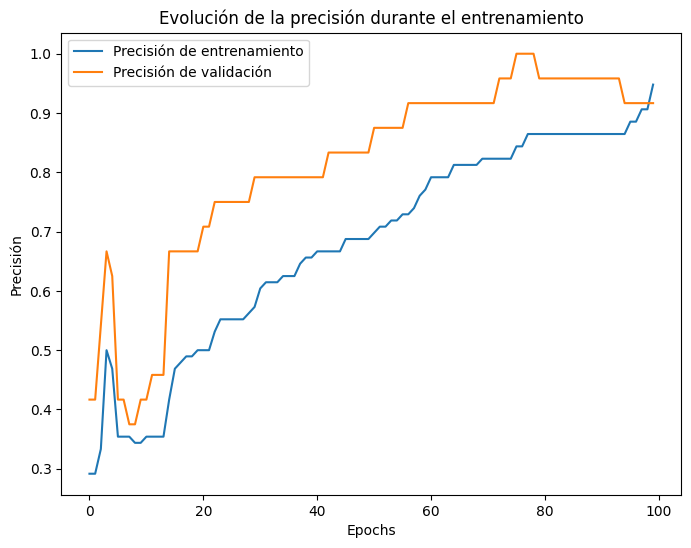

10863/10863 ━━━━━━━━━━━━━━━━━━━━ 39s 4ms/step


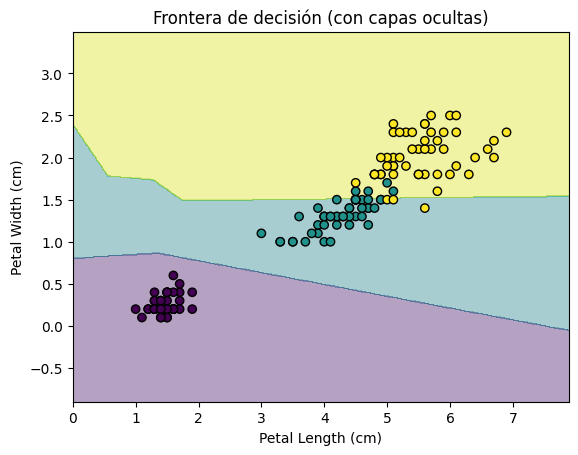

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 8)                   │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 155 (624.00 B)

 Trainable params: 51 (204.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 104 (420.00 B)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Mean Squared Error (MSE) difference: 0.0082
Mean Squared Error (MSE) on training data: 0.0951
Mean Squared Error (MSE) on test data: 0.0868
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


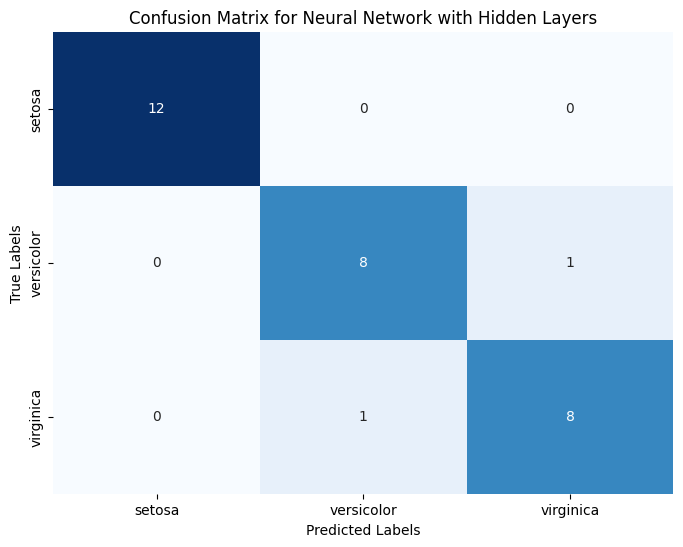

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import random

# Fijar la semilla para reproducibilidad
seed_value = 30
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)

# Cargar el dataset Iris
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, 2:]  # Usamos solo Petal Length y Petal Width
y = iris.target  # Clases

# Convertir las clases a formato categórico (one-hot encoding)
encoder = LabelEncoder()
y_encoded = to_categorical(encoder.fit_transform(y))

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=seed_value)

# Crear el modelo de red neuronal con capas ocultas
model_hidden = Sequential()

# Capa oculta con 8 neuronas y activación ReLU
model_hidden.add(Dense(units=8, input_shape=(X_train.shape[1],), activation='relu'))

# Capa de salida con 3 neuronas (para 3 clases) y activación softmax
model_hidden.add(Dense(units=3, activation='softmax'))

# Compilar el modelo
model_hidden.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo con la capa oculta y guardamos la historia
history = model_hidden.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1, validation_split=0.2)

# Evaluar el modelo en el conjunto de prueba
loss_hidden, accuracy_hidden = model_hidden.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba (con capas ocultas): {accuracy_hidden * 100:.2f}%')

# Visualización de la distribución de los puntos
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Distribución de las clases en el dataset Iris (Petal Length vs Petal Width)')
plt.colorbar(scatter, label='Clase')
plt.show()

# Visualización de las fronteras de decisión
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Graficar la evolución de la pérdida durante el entrenamiento
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Epochs')
plt.ylabel('Pérdida')
plt.title('Evolución de la pérdida durante el entrenamiento')
plt.legend()
plt.show()


# Graficar la evolución de la precisión durante el entrenamiento
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Epochs')
plt.ylabel('Precisión')
plt.title('Evolución de la precisión durante el entrenamiento')
plt.legend()
plt.show()

# Concatenar los valores de la cuadrícula
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Predecir con el modelo de red neuronal con capas ocultas
Z_hidden = model_hidden.predict(grid_points)
Z_hidden = np.argmax(Z_hidden, axis=1).reshape(xx.shape)

# Graficar las fronteras de decisión
plt.contourf(xx, yy, Z_hidden, alpha=0.4, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o', cmap='viridis')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Frontera de decisión (con capas ocultas)')
plt.show()

# Resumen de capas y parámetros
model_hidden.summary()

# Mean Squared Error (MSE) Calculation for both Train and Test Data
y_train_pred_probs = model_hidden.predict(X_train)
y_test_pred_probs = model_hidden.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred_probs)
mse_test = mean_squared_error(y_test, y_test_pred_probs)
mse_diff = mse_train - mse_test

# Print MSE results
print(f'Mean Squared Error (MSE) difference: {mse_diff:.4f}')
print(f'Mean Squared Error (MSE) on training data: {mse_train:.4f}')
print(f'Mean Squared Error (MSE) on test data: {mse_test:.4f}')

# Generate predictions for the test data
y_test_pred_probs = model_hidden.predict(X_test)

# Convert predicted probabilities to class labels (one with highest probability)
y_pred_labels = np.argmax(y_test_pred_probs, axis=1)

# Convert true test labels from one-hot encoding to class labels
y_test_labels = np.argmax(y_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test_labels, y_pred_labels)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Neural Network with Hidden Layers')
plt.show()

# Iris model con capas ocultas y ajustes

Epoch 1/1000


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 177ms/step - accuracy: 0.2648 - loss: 1.7588 - val_accuracy: 0.4167 - val_loss: 1.3028
Epoch 2/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.2281 - loss: 1.7085 - val_accuracy: 0.3333 - val_loss: 1.2537
Epoch 3/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2683 - loss: 1.5873 - val_accuracy: 0.1250 - val_loss: 1.2138
Epoch 4/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.2895 - loss: 1.4369 - val_accuracy: 0.0417 - val_loss: 1.1819
Epoch 5/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1659 - loss: 1.5119 - val_accuracy: 0.0417 - val_loss: 1.1551
Epoch 6/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1678 - loss: 1.3909 - val_accuracy: 0.2083 - val_loss: 1.1301
Epoch 7/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1849 - loss: 1.3384 - val_accuracy: 0.3750 - val_loss: 1.1095
Epoch 8/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2936 - loss: 1.3293 - val_accuracy: 0.3750 - va

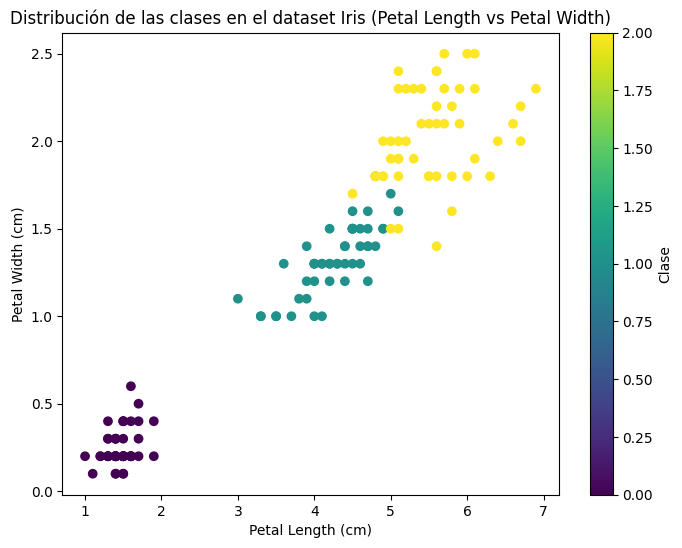

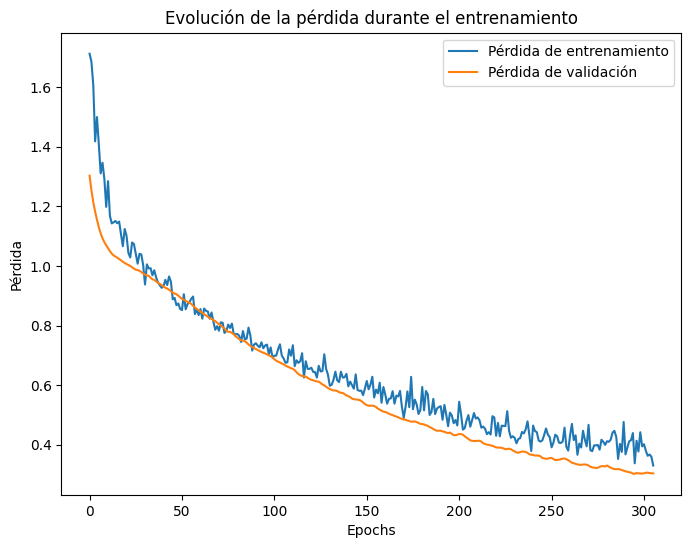

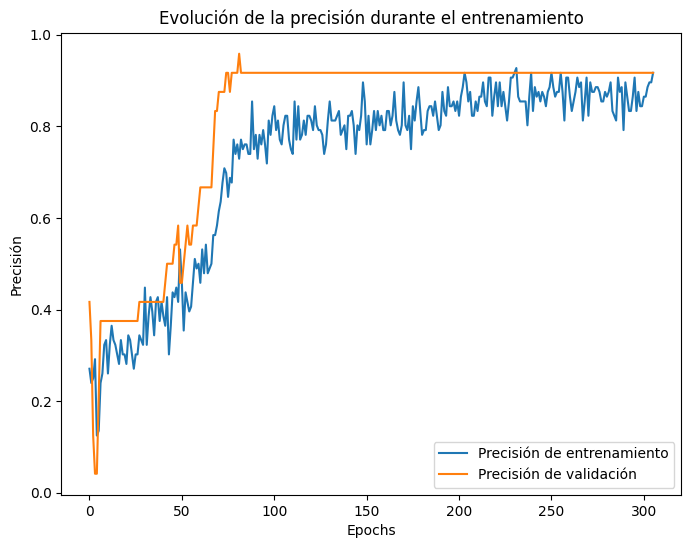

10863/10863 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step


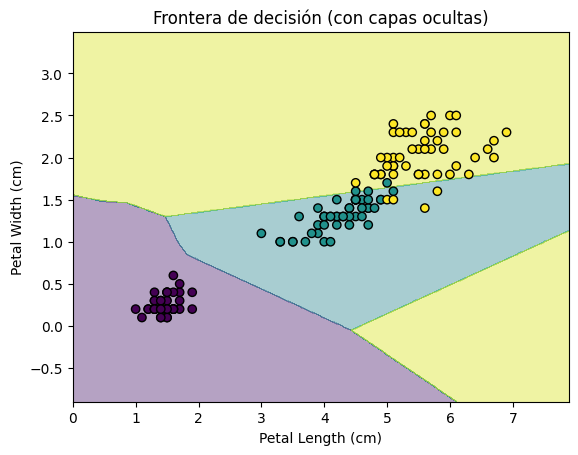

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                     │ (None, 8)                   │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 155 (624.00 B)

 Trainable params: 51 (204.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 104 (420.00 B)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 283ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step
Mean Squared Error (MSE) difference: -0.0011
Mean Squared Error (MSE) on training data: 0.0522
Mean Squared Error (MSE) on test data: 0.0533
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 884ms/step


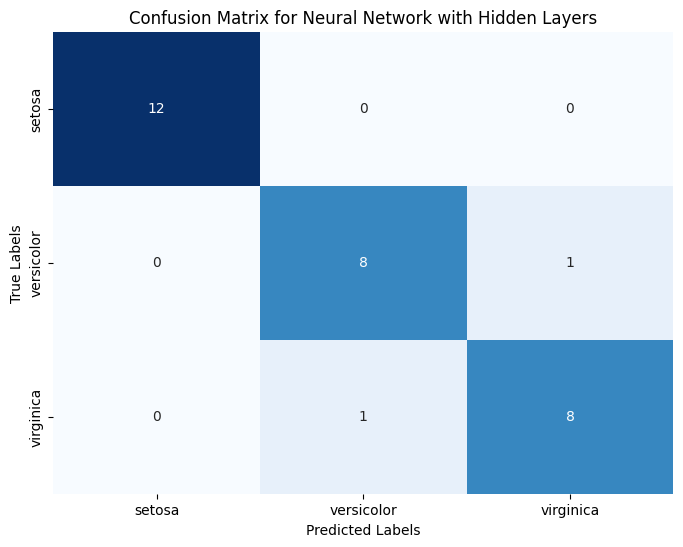

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import random

# Fijar la semilla para reproducibilidad
seed_value = 30
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)

# Cargar el dataset Iris
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, 2:]  # Usamos solo Petal Length y Petal Width
y = iris.target  # Clases

# Convertir las clases a formato categórico (one-hot encoding)
encoder = LabelEncoder()
y_encoded = to_categorical(encoder.fit_transform(y))

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=seed_value)

# Crear el modelo de red neuronal con capas ocultas
model_hidden = Sequential()

# Capa oculta con 8 neuronas y activación ReLU
model_hidden.add(Dense(units=8, input_shape=(X_train.shape[1],), activation='relu'))
model_hidden.add(Dropout(0.2))

# Capa de salida con 3 neuronas (para 3 clases) y activación softmax
model_hidden.add(Dense(units=3, activation='softmax'))

# Compilar el modelo
model_hidden.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Definir el EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entrenar el modelo con la capa oculta
history = model_hidden.fit(
    X_train, y_train,
    epochs=1000,
    batch_size=10,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluar el modelo en el conjunto de prueba
loss_hidden, accuracy_hidden = model_hidden.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba (con capas y ajustado): {accuracy_hidden * 100:.2f}%')

# Visualización de la distribución de los puntos
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Distribución de las clases en el dataset Iris (Petal Length vs Petal Width)')
plt.colorbar(scatter, label='Clase')
plt.show()

# Visualización de las fronteras de decisión
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Graficar la evolución de la pérdida durante el entrenamiento
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Epochs')
plt.ylabel('Pérdida')
plt.title('Evolución de la pérdida durante el entrenamiento')
plt.legend()
plt.show()


# Graficar la evolución de la precisión durante el entrenamiento
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Epochs')
plt.ylabel('Precisión')
plt.title('Evolución de la precisión durante el entrenamiento')
plt.legend()
plt.show()

# Concatenar los valores de la cuadrícula
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Predecir con el modelo de red neuronal con capas ocultas
Z_hidden = model_hidden.predict(grid_points)
Z_hidden = np.argmax(Z_hidden, axis=1).reshape(xx.shape)

# Graficar las fronteras de decisión
plt.contourf(xx, yy, Z_hidden, alpha=0.4, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o', cmap='viridis')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Frontera de decisión (con capas ocultas)')
plt.show()

# Resumen de capas y parámetros
model_hidden.summary()

# Mean Squared Error (MSE) Calculation for both Train and Test Data
y_train_pred_probs = model_hidden.predict(X_train)
y_test_pred_probs = model_hidden.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred_probs)
mse_test = mean_squared_error(y_test, y_test_pred_probs)
mse_diff = mse_train - mse_test

# Print MSE results
print(f'Mean Squared Error (MSE) difference: {mse_diff:.4f}')
print(f'Mean Squared Error (MSE) on training data: {mse_train:.4f}')
print(f'Mean Squared Error (MSE) on test data: {mse_test:.4f}')

# Generate predictions for the test data
y_test_pred_probs = model_hidden.predict(X_test)

# Convert predicted probabilities to class labels (one with highest probability)
y_pred_labels = np.argmax(y_test_pred_probs, axis=1)

# Convert true test labels from one-hot encoding to class labels
y_test_labels = np.argmax(y_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test_labels, y_pred_labels)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Neural Network with Hidden Layers')
plt.show()